<a href="https://colab.research.google.com/github/9943956/Analise-da-rentabilidade-da-minha-Rig-de-mineracao-de-Criptoativos./blob/main/Projeto_de_investimentos_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importandos as bibliotecas




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import scipy.stats as scs

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Codificação do projeto

In [ ]:
#Baixando os dados do Yahoo
dados = ['PETR4.SA', 'VALE3.SA','BBAS3.SA', '^BVSP', 'EMBR3.SA']
df = web.get_data_yahoo(dados, start = '2021-12-01')
precos = df['Adj Close']
precos

[*********************100%***********************]  5 of 5 completed


,BBAS3.SA,EMBR3.SA,PETR4.SA,VALE3.SA,^BVSP
Date,,,,,
2021-12-01,29.865723,18.299999,21.613478,67.629929,100775.0
2021-12-02,30.686314,19.360001,23.262600,70.769234,104466.0
2021-12-03,30.724482,19.150000,23.590704,69.209213,105070.0
2021-12-06,31.554615,20.230000,23.697338,72.964821,106859.0
2021-12-07,31.106150,20.299999,24.082861,73.504097,107558.0
...,...,...,...,...,...
2022-06-10,34.293858,12.050000,29.650000,84.559998,105481.0
2022-06-13,33.509716,11.350000,29.270000,81.879997,102598.0
2022-06-14,33.520000,11.290000,29.600000,81.720001,102063.0


In [ ]:
#trocando os titulos das colunas
titulo = precos.columns=['BB','EMBRAER','PETRO','VALE','IBOV' ]
precos.columns=['BB','EMBRAER','PETRO','VALE','IBOV' ]
precos


,BB,EMBRAER,PETRO,VALE,IBOV
Date,,,,,
2021-12-01,29.865723,18.299999,21.613478,67.629929,100775.0
2021-12-02,30.686314,19.360001,23.262600,70.769234,104466.0
2021-12-03,30.724482,19.150000,23.590704,69.209213,105070.0
2021-12-06,31.554615,20.230000,23.697338,72.964821,106859.0
2021-12-07,31.106150,20.299999,24.082861,73.504097,107558.0
...,...,...,...,...,...
2022-06-10,34.293858,12.050000,29.650000,84.559998,105481.0
2022-06-13,33.509716,11.350000,29.270000,81.879997,102598.0
2022-06-14,33.520000,11.290000,29.600000,81.720001,102063.0


In [ ]:
## Exportar os dados para o Excel
precos.to_excel('precos.xlsx', encoding='utf-8', index=True)

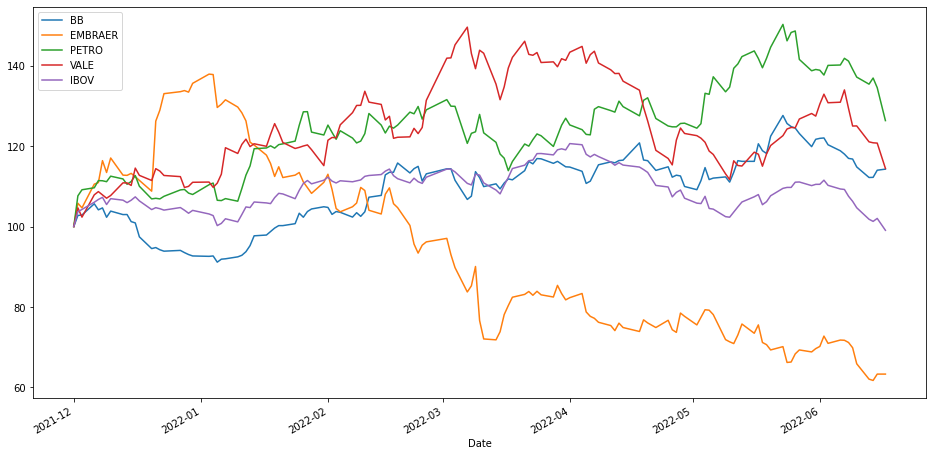

In [ ]:
## Plotar gráficos de preços na base 100
(precos/precos.iloc[0]*100).plot(figsize= (16,8))

In [ ]:
## Estimando os retornos diários
retornos=precos.pct_change()
retornos=retornos.dropna()
retornos

,BB,EMBRAER,PETRO,VALE,IBOV
Date,,,,,
2021-12-02,0.027476,0.057924,0.076301,0.046419,0.036626
2021-12-03,0.001244,-0.010847,0.014104,-0.022044,0.005782
2021-12-06,0.027019,0.056397,0.004520,0.054265,0.017027
2021-12-07,-0.014212,0.003460,0.016269,0.007391,0.006541
2021-12-08,0.004601,0.049261,-0.000341,-0.007468,0.005002
...,...,...,...,...,...
2022-06-10,-0.016790,-0.057120,-0.013967,0.000237,-0.015062
2022-06-13,-0.022865,-0.058091,-0.012816,-0.031693,-0.027332
2022-06-14,0.000307,-0.005286,0.011274,-0.001954,-0.005215


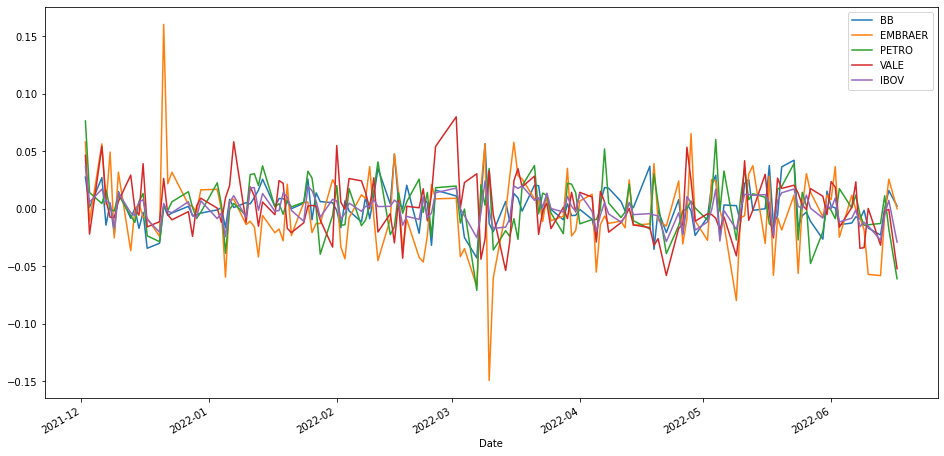

In [ ]:
##Plotando o gráfico dos retornos
retornos.plot(figsize=(16,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1424340a50>,
      dtype=object)

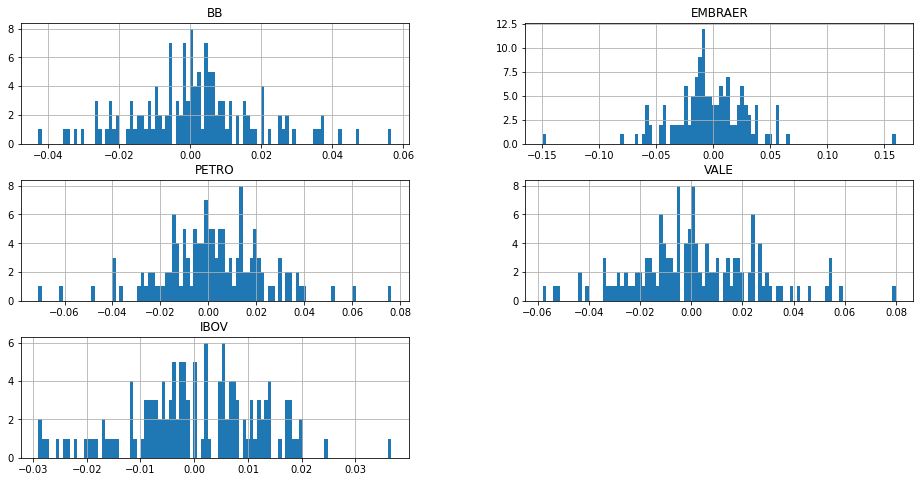

In [ ]:
##plotando Histogramas

retornos.hist(bins=100, figsize=(16,8))

## Estatísticas Descritivas

In [ ]:
retornos.max()

BB         0.056575
EMBRAER    0.160221
PETRO      0.076301
VALE       0.079866
IBOV       0.036626
dtype: float64

In [ ]:
retornos.min()

BB        -0.042773
EMBRAER   -0.149272
PETRO     -0.070990
VALE      -0.057963
IBOV      -0.029006
dtype: float64

In [ ]:
##Estimando a assimetria dos dados
desvios= retornos-retornos.mean()
sig=retornos.std(ddof=0)
S=((desvios**3) / (sig**3)).mean()
S



BB         0.338012
EMBRAER    0.165668
PETRO     -0.030621
VALE       0.311040
IBOV      -0.187123
dtype: float64

In [ ]:
scs.skew(retornos)     ## fazendo exatamente a mesma coisa que o código acima, porém com o comando 'skew', então se torna um array

array([ 0.33801183,  0.16566788, -0.03062105,  0.31104049, -0.18712282])

In [ ]:
scs.describe(retornos)

DescribeResult(nobs=135, minmax=(array([-0.04277288, -0.14927179, -0.07099038, -0.05796258, -0.02900581]), array([0.0565748 , 0.16022102, 0.07630064, 0.0798657 , 0.03662615])), mean=array([ 1.13173258e-03, -2.80983649e-03,  1.96717053e-03,  1.28254932e-03,
        2.66753971e-06]), variance=array([0.00028864, 0.00115313, 0.00046938, 0.00057039, 0.00014649]), skewness=array([ 0.33801183,  0.16566788, -0.03062105,  0.31104049, -0.18712282]), kurtosis=array([0.72610223, 5.04077502, 1.48559691, 0.54019657, 0.05836937]))

In [ ]:
estat = scs.describe(retornos)
colunas = ['BB','EMBRAER','PETRO','VALE','IBOV' ]
linhas = ['Minimo', 'Máximo', 'Média', 'Variância','Desvio-Padrão','Assimetria','Curtose']
min = estat[1][0]
max = estat[1][1]
media = estat[2]
variancia = estat[3]
desvio_padrao = variancia**(1/2)
assimetria = estat[4]
curtose = estat[5]
estat_desc = [min, max, media, variancia, desvio_padrao, assimetria, curtose]
estat_desc

df=pd.DataFrame(data= estat_desc, index = linhas, columns = colunas)
df

,BB,EMBRAER,PETRO,VALE,IBOV
Minimo,-0.042773,-0.149272,-0.070990,-0.057963,-0.029006
Máximo,0.056575,0.160221,0.076301,0.079866,0.036626
Média,0.001132,-0.002810,0.001967,0.001283,0.000003
Variância,0.000289,0.001153,0.000469,0.000570,0.000146
Desvio-Padrão,0.016990,0.033958,0.021665,0.023883,0.012103
Assimetria,0.338012,0.165668,-0.030621,0.311040,-0.187123
Curtose,0.726102,5.040775,1.485597,0.540197,0.058369


In [ ]:
## Estimar os retornos esperados
t = titulo
r_e = retornos.mean()
var = retornos.var()
vol = var**0.5

## Estimando a matriz de covariância
matriz_covar= retornos.cov()
matriz_covar

,BB,EMBRAER,PETRO,VALE,IBOV
BB,0.000289,0.000196,0.000141,0.000038,0.000126
EMBRAER,0.000196,0.001153,0.000124,0.000098,0.000196
PETRO,0.000141,0.000124,0.000469,0.000138,0.000148
VALE,0.000038,0.000098,0.000138,0.000570,0.000156
IBOV,0.000126,0.000196,0.000148,0.000156,0.000146


##Retornos esperados

In [ ]:
r_e_BB = r_e['BB']
r_e_BB

0.0011317325793669915

In [ ]:
r_e_EMB = r_e['EMBRAER']
r_e_EMB

-0.002809836489981582

In [ ]:
r_e_PET = r_e['PETRO']
r_e_PET

0.0019671705333923566

In [ ]:
r_e_VAL = r_e['VALE']
r_e_VAL

0.0012825493218771688

In [ ]:
r_e_IB = r_e['IBOV']
r_e_IB

2.6675397131020122e-06

In [ ]:
##Volatilidade e Covariância
vol_BB = vol['BB']
vol_EMB = vol['EMBRAER']
vol_PET = vol['PETRO']
vol_VALE = vol['VALE']
vol_IBOV = vol['IBOV']

cov_invests = retornos['BB'].cov(retornos['EMBRAER'])
cov_invests


#Peso de cada ativo

wa = 0.7
wb = 1 - wa

#Retorno e risco desta carteira de investimentos

ret_port = wa * r_e_BB + wb * r_e_EMB
vol_port = (wa ** 2 * vol_BB + wb ** 2 * vol_EMB**2+2*wa*wb*cov_invests) ** 0.5

dados = pd.DataFrame(data=[wa,wb,ret_port, vol_port], index = ['BB (%)','EMBRAER (%)','Retorno','Risco'], columns =['Carteira de investimentos'])
dados





,Carteira de investimentos
BB (%),0.700000
EMBRAER (%),0.300000
Retorno,-0.000051
Risco,0.092254


In [ ]:
## Montar curva de risco e retorno